In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
from datetime import datetime
import numpy as np
import timeit
import json
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier




/Users/regi/miniconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
main_df = pd.read_csv('main_df.csv')

In [3]:
main_df.shape

(4161, 23)

In [4]:
main_df.pledged_to_goal_ratio.describe()

count     4161.000000
mean         8.220366
std        294.847153
min          0.000000
25%          0.067294
50%          0.574000
75%          1.288889
max      18110.110000
Name: pledged_to_goal_ratio, dtype: float64

In [5]:
len(main_df[main_df.pledged_to_goal_ratio > 0.5]) / main_df.shape[0] 

0.5390531122326364

In [6]:
main_df[(main_df.pledged_to_goal_ratio > 0.5) & (main_df.outcome_state == 'failed')]

,project_id,outcome_state,final_usd_pledged,final_backers_count,project_name,project_description,live_state,in_mid_duration_range,usd_goal,usd_pledged,currency,launched_at,deadline,staff_pick,country,main_category,duration,days_from_launch,backers_count,project_link,creator_link,pledged_to_goal_ratio,description_len
272,1434620258,failed,7782.000000,42,Lauren Sova - Recording an EP!,"My debut album - a journey of faith, hope, and...",live,True,10000.000000,5784.000000,USD,09-01-2019,10-01-2019,False,US,Music,30,10,15,https://www.kickstarter.com/projects/laurensov...,https://www.kickstarter.com/profile/laurensova,0.578400,77
375,1424442335,failed,1100.000000,21,HERE LIES LAUREN,Short Film: Alex wants to read a destructive e...,live,True,1200.000000,646.000000,USD,09-03-2019,09-22-2019,False,US,Film & Video,18,8,16,https://www.kickstarter.com/projects/jonathanr...,https://www.kickstarter.com/profile/jonathanrome,0.538333,129
666,911101523,failed,3823.564927,41,AnyBag：Backpack with Anti-Theft Fingerprint Lock,Another innovation for AnySafe team. Redefine...,live,True,6144.628062,3156.069646,HKD,08-20-2019,10-04-2019,False,HK,Technology,45,22,34,https://www.kickstarter.com/projects/anysafelo...,https://www.kickstarter.com/profile/anysafelock,0.513631,72
968,2095925334,failed,149.798353,8,The Animal Lovers' T-Shirt,A stylish t-shirt to contribute and to show yo...,live,True,640.163900,518.532759,HKD,07-01-2019,07-31-2019,False,HK,Fashion,30,16,12,https://www.kickstarter.com/projects/nodogmeat...,https://www.kickstarter.com/profile/nodogmeatasia,0.810000,81
1859,248643210,failed,2459.408148,18,I Dreamt I Was a Butterfly: An exquisite handc...,The first ever photo art book of butterflies p...,live,True,4359.507615,2368.988731,GBP,04-29-2019,05-29-2019,False,GB,Photography,30,16,16,https://www.kickstarter.com/projects/176921882...,https://www.kickstarter.com/profile/1769218820,0.543407,127
3272,1700466341,failed,989.209343,19,The slinky sofa side table for the relaxation ...,Laser cut wood and handmade flexible couch arm...,live,True,1133.114940,878.164078,EUR,03-06-2019,03-27-2019,False,IT,Technology,20,7,19,https://www.kickstarter.com/projects/lohn/desi...,https://www.kickstarter.com/profile/lohn,0.775000,134
3315,1265979434,failed,522.000000,9,"""MAKE AMERICA SANE AGAIN"" STAGED READING",Used Car Salesman. Con Artist. Total Loser! Su...,live,True,1000.000000,522.000000,USD,12-28-2018,02-03-2019,False,US,Theater,37,19,9,https://www.kickstarter.com/projects/114214478...,https://www.kickstarter.com/profile/1142144781,0.522000,133
3434,612140504,failed,10464.000000,183,Crooked Way Gothic Tarot,"Walk on the Dark Side with this new, gleefully...",live,True,14000.000000,7605.000000,USD,12-28-2018,01-28-2019,False,US,Art,31,19,137,https://www.kickstarter.com/projects/191192009...,https://www.kickstarter.com/profile/1911920092,0.543214,135


In [7]:
main_df[main_df.pledged_to_goal_ratio > 0.5]

,project_id,outcome_state,final_usd_pledged,final_backers_count,project_name,project_description,live_state,in_mid_duration_range,usd_goal,usd_pledged,currency,launched_at,deadline,staff_pick,country,main_category,duration,days_from_launch,backers_count,project_link,creator_link,pledged_to_goal_ratio,description_len
5,1286950238,successful,818.000000,17,Ecopolis,"An immersive, creative showcase for urban envi...",live,True,500.000000,507.000000,USD,08-15-2019,09-29-2019,False,US,Art,45,27,9,https://www.kickstarter.com/projects/salttreea...,https://www.kickstarter.com/profile/salttreeart,1.014000,60
11,553124483,successful,3033.595732,89,Explorers from Earth,The space exploration in a unique poster,live,True,255.017185,1986.916503,EUR,08-29-2019,09-28-2019,False,ES,Design,30,13,62,https://www.kickstarter.com/projects/alpoma/ex...,https://www.kickstarter.com/profile/alpoma,7.791304,40
13,135294161,successful,34956.000000,756,Omen: Heir to the Dunes,Fast-paced tactical card-game set within the s...,live,True,10000.000000,23683.000000,USD,09-05-2019,09-19-2019,False,US,Games,14,6,492,https://www.kickstarter.com/projects/kolossalg...,https://www.kickstarter.com/profile/kolossalgames,2.368300,70
14,946981010,successful,8091.000000,148,Totally Rad Life of Violet #2,Presented by Totally Rad Comics,live,True,800.000000,3808.000000,USD,08-29-2019,09-30-2019,False,US,Comics,32,13,85,https://www.kickstarter.com/projects/totallyra...,https://www.kickstarter.com/profile/totallyrad...,4.760000,31
16,947032706,successful,144056.895403,1115,Open-air pants by alder: for all women & every...,"Designed for outdoor recreation + travel, the ...",live,True,15064.120400,68490.748240,CAD,08-20-2019,09-26-2019,True,CA,Fashion,37,22,555,https://www.kickstarter.com/projects/alder/ope...,https://www.kickstarter.com/profile/alder,4.546614,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,615338815,successful,535.000000,44,At the Marsh House,A book of poems collected from the journals I ...,live,True,100.000000,320.000000,USD,01-12-2017,01-19-2017,False,US,Publishing,7,2,22,https://www.kickstarter.com/projects/211449056...,https://www.kickstarter.com/profile/2114490562,3.200000,106
4146,1722309631,successful,10520.370000,355,The Misbehavin' Maidens' Nerdier & Dirtier Sec...,#MoreMaidens! More nerdy! More dirty! More sex...,live,True,5000.000000,8058.000000,USD,01-03-2017,02-02-2017,False,US,Music,30,11,264,https://www.kickstarter.com/projects/luckyanni...,https://www.kickstarter.com/profile/luckyannie,1.611600,78
4149,481076997,successful,2094.000000,78,The Strange Sourcebook #1,"The Strange Sourcebook is your ""go to"" book fo...",live,True,1900.000000,1431.000000,USD,12-23-2016,01-31-2017,False,US,Comics,39,22,49,https://www.kickstarter.com/projects/158227299...,https://www.kickstarter.com/profile/1582272995,0.753158,127
4154,1874233413,successful,4320.000000,225,The Slip #1: A Sci-Fi Tale of Grief and Interd...,"Series debut of a comic with spaceships, alien...",live,True,3000.000000,2170.000000,USD,01-03-2017,02-02-2017,True,US,Comics,30,11,116,https://www.kickstarter.com/projects/124559745...,https://www.kickstarter.com/profile/124559745,0.723333,134


In [8]:
model_cols = ['usd_goal', 'pledged_to_goal_ratio', 'duration', 'staff_pick',
              'country', 'main_category', 'backers_count', 'description_len', 'outcome_state']
continuous_cols = ['usd_goal', 'duration', 'backers_count', 'pledged_to_goal_ratio', 'description_len']
categorical_cols = ['staff_pick', 'country', 'main_category']

drop_cols = list(set(main_df.columns.to_list()) - set(model_cols))

In [9]:
# create model_df 
model_df = main_df.drop(drop_cols, axis=1)
model_df.head(1)

,outcome_state,usd_goal,staff_pick,country,main_category,duration,backers_count,pledged_to_goal_ratio,description_len
0,successful,5000.0,False,US,Theater,50,24,0.315,58


In [10]:
# encoding binary variables 
model_df['outcome_state'] = model_df['outcome_state'].map({'successful': 1, 'failed': 0})
model_df['staff_pick'] = model_df['staff_pick'].astype(int)


In [11]:
model_df.head(3)

,outcome_state,usd_goal,staff_pick,country,main_category,duration,backers_count,pledged_to_goal_ratio,description_len
0,1,5000.0,0,US,Theater,50,24,0.31500,58
1,0,1000.0,0,US,Crafts,45,2,0.00600,117
2,0,25000.0,0,US,Film & Video,45,2,0.00008,78


In [12]:
# Function to dummy categorical variables
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [13]:
dummy_model_df = dummy_df(model_df, ['country', 'main_category'])

X = dummy_model_df.drop('outcome_state', axis=1)
y = dummy_model_df.loc[:, 'outcome_state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=60)

In [14]:
X

,usd_goal,staff_pick,duration,backers_count,pledged_to_goal_ratio,description_len,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,5000.0000,0,50,24,0.315000,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1000.0000,0,45,2,0.006000,117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,25000.0000,0,45,2,0.000080,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,7000.0000,0,30,1,0.000143,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,45000.0000,0,34,14,0.042356,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,105000.0000,0,30,5,0.001352,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4157,1033.0000,0,30,1,0.010000,127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4158,15000.0000,0,37,0,0.000000,125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4159,7000.0000,0,30,0,0.000000,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Decision tree 

In [44]:
tree_classifier = DecisionTreeClassifier(max_depth=50)  
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
# visualizing the classifier tree
tree_classifier_pred = tree_classifier.predict(X_test)

# Confusion matrix metrics
print(f"Precision Score (Test): {precision_score(y_test, tree_classifier_pred)}")
print(f"Recall Score (Test): {recall_score(y_test, tree_classifier_pred)}")
print(f"accuracy Score (Test): {accuracy_score(y_test, tree_classifier_pred)}")
print(f"F1 Score (Test): {f1_score(y_test, tree_classifier_pred)}")

print(precision_score(y_test, tree_classifier_pred))
print(recall_score(y_test, tree_classifier_pred))
print(accuracy_score(y_test, tree_classifier_pred))
print(f1_score(y_test, tree_classifier_pred))


Precision Score (Test): 0.9396092362344582
Recall Score (Test): 0.9412811387900356
accuracy Score (Test): 0.9195678271308524
F1 Score (Test): 0.9404444444444444
0.9396092362344582
0.9412811387900356
0.9195678271308524
0.9404444444444444


In [46]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,10), dpi = 300)
    plt.style.use('ggplot')
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


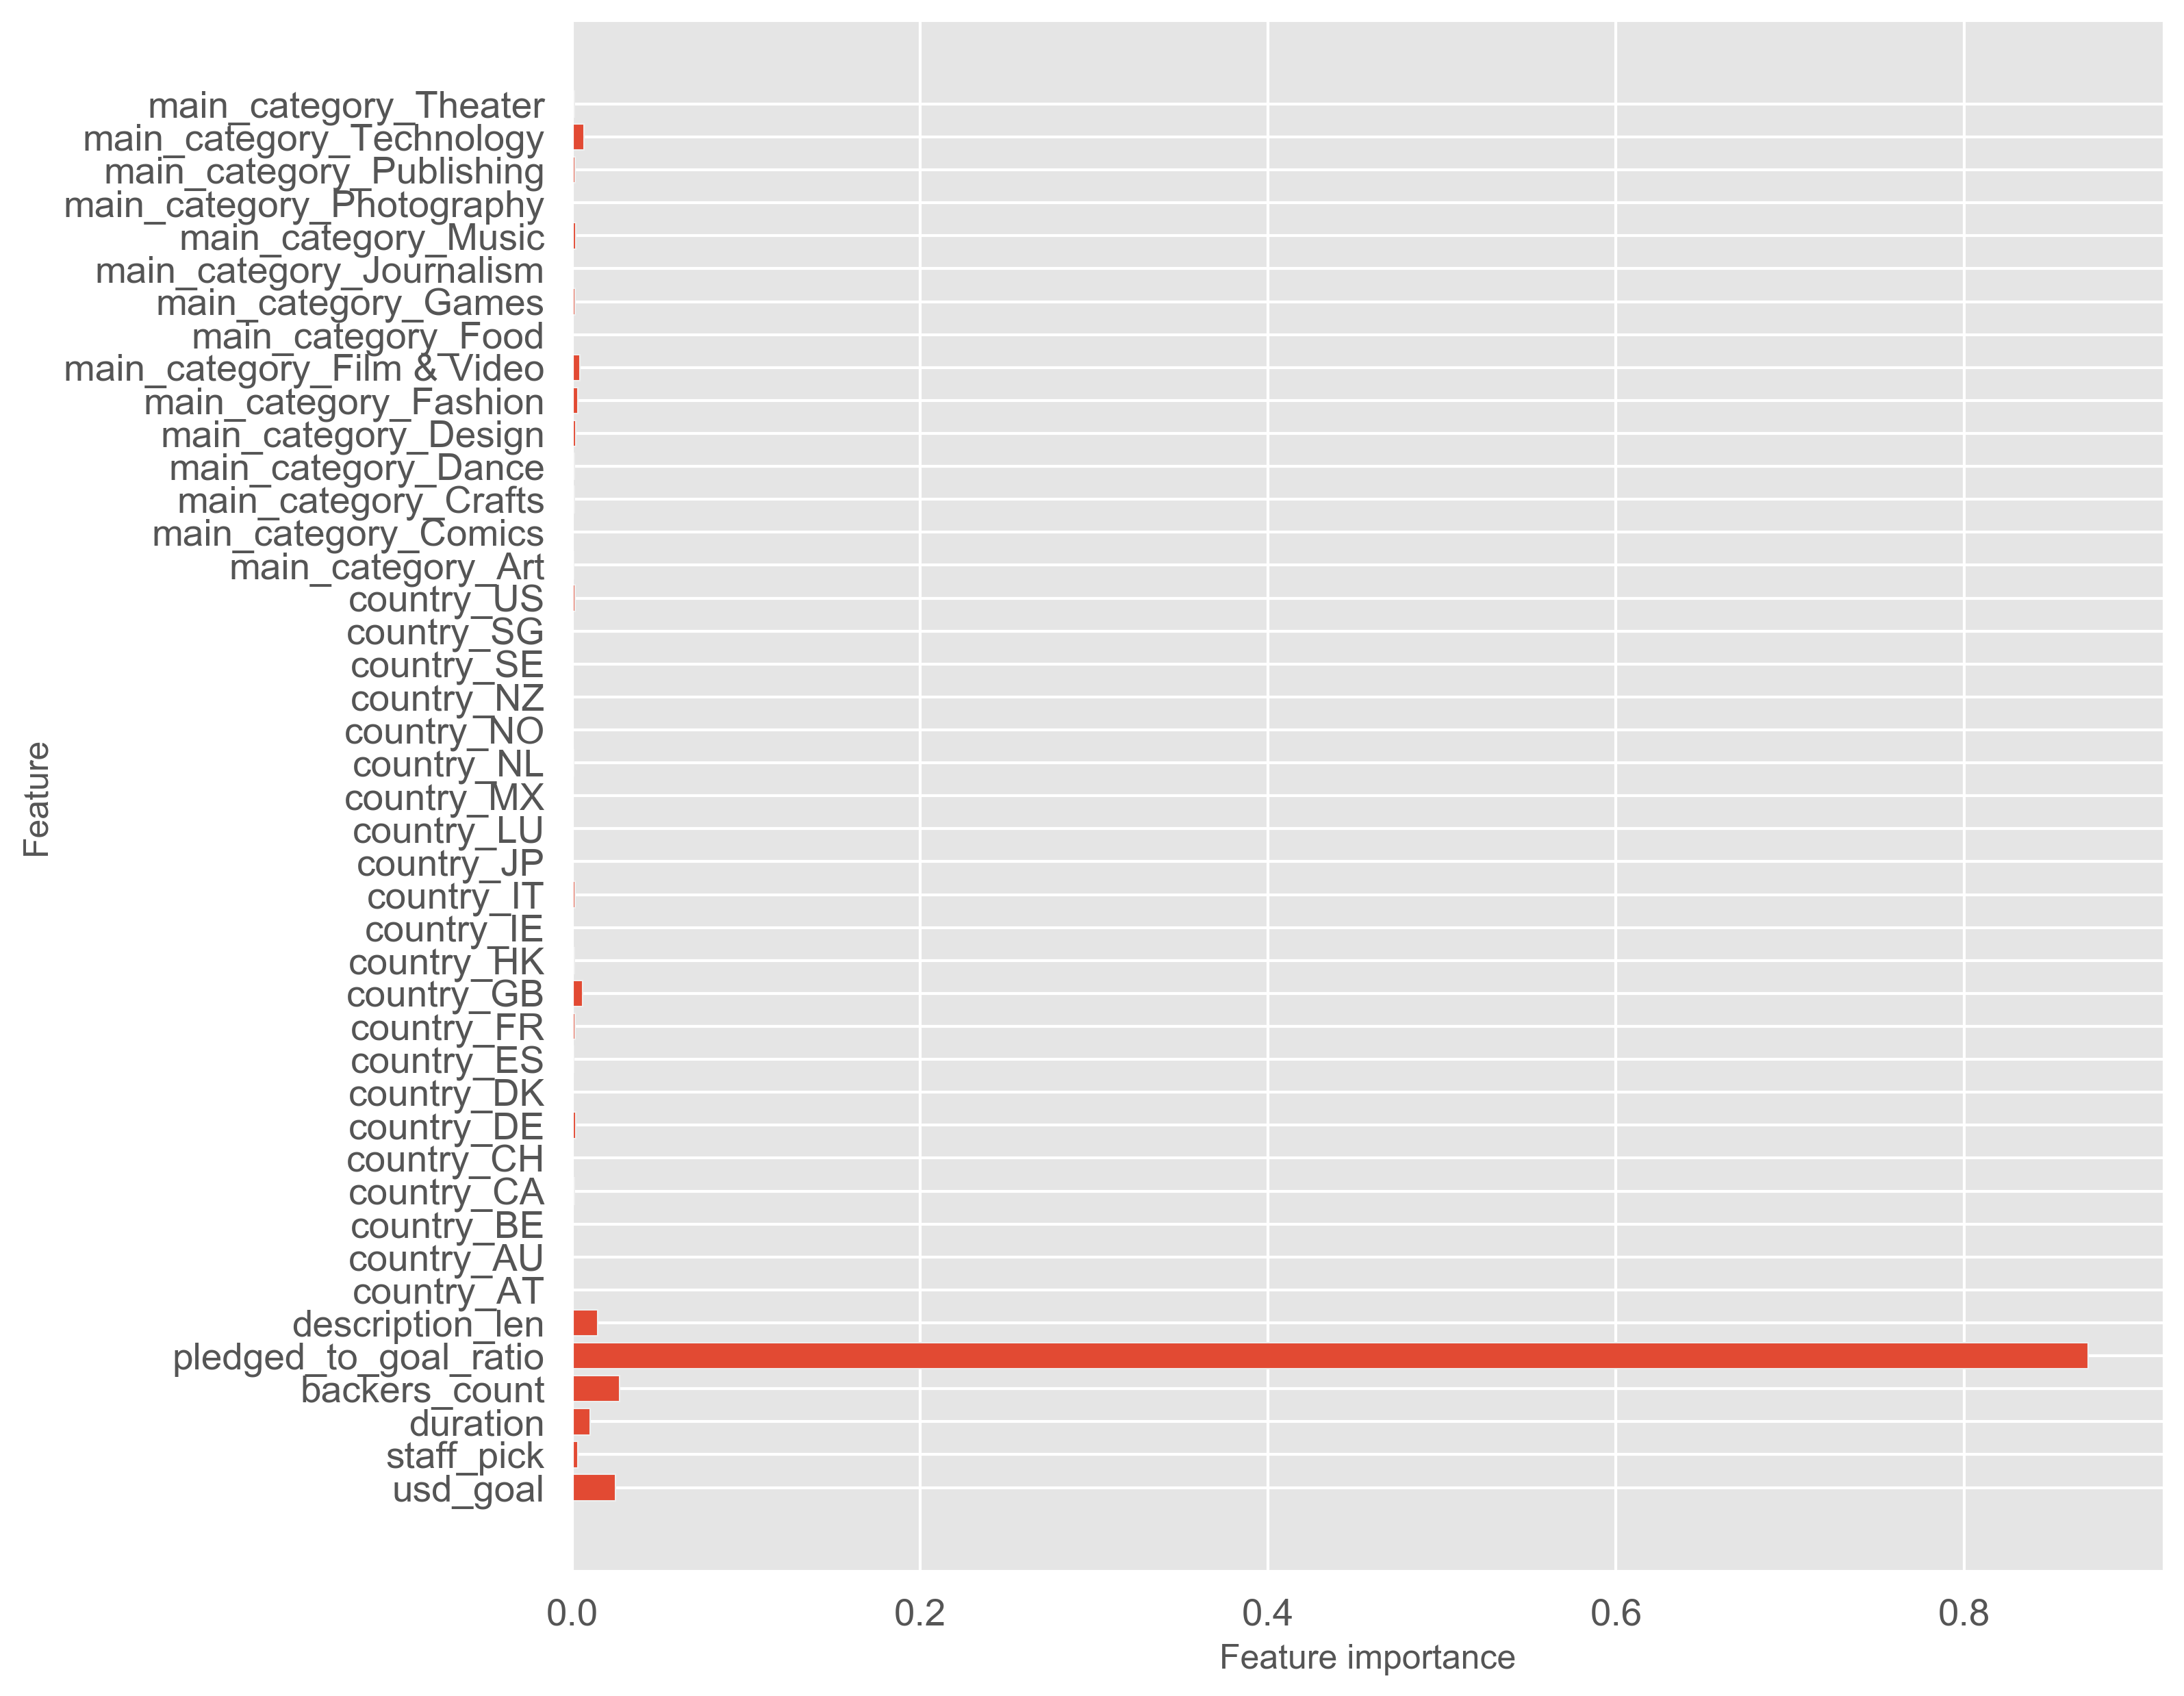

In [47]:
plot_feature_importances(tree_classifier)

## Bagged trees

In [19]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=2), 
                                 n_estimators=20)
bagged_tree.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=2,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [20]:
bagged_tree_pred = bagged_tree.predict(X_test)

# Confusion matrix metrics
print(f"Precision Score (Test): {precision_score(y_test, bagged_tree_pred)}")
print(f"Recall Score (Test): {recall_score(y_test, bagged_tree_pred)}")
print(f"accuracy Score (Test): {accuracy_score(y_test, bagged_tree_pred)}")
print(f"F1 Score (Test): {f1_score(y_test, bagged_tree_pred)}")

print({precision_score(y_test, bagged_tree_pred)})
print({recall_score(y_test, bagged_tree_pred)})
print({accuracy_score(y_test, bagged_tree_pred)})
print({f1_score(y_test, bagged_tree_pred)})


Precision Score (Test): 0.9543859649122807
Recall Score (Test): 0.9679715302491103
accuracy Score (Test): 0.9471788715486195
F1 Score (Test): 0.96113074204947
{0.9543859649122807}
{0.9679715302491103}
{0.9471788715486195}
{0.96113074204947}


### Random Forest

In [21]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
forest_pred = forest.predict(X_test)


In [23]:
# Confusion matrix metrics
print(f"Precision Score (Test): {precision_score(y_test, forest_pred)}")
print(f"Recall Score (Test): {recall_score(y_test, forest_pred)}")
print(f"accuracy Score (Test): {accuracy_score(y_test, forest_pred)}")
print(f"F1 Score (Test): {f1_score(y_test, forest_pred)}")

print({precision_score(y_test, forest_pred)})
print({recall_score(y_test, forest_pred)})
print({accuracy_score(y_test, forest_pred)})
print({f1_score(y_test, forest_pred)})

Precision Score (Test): 0.9187396351575456
Recall Score (Test): 0.9857651245551602
accuracy Score (Test): 0.9315726290516206
F1 Score (Test): 0.9510729613733906
{0.9187396351575456}
{0.9857651245551602}
{0.9315726290516206}
{0.9510729613733906}


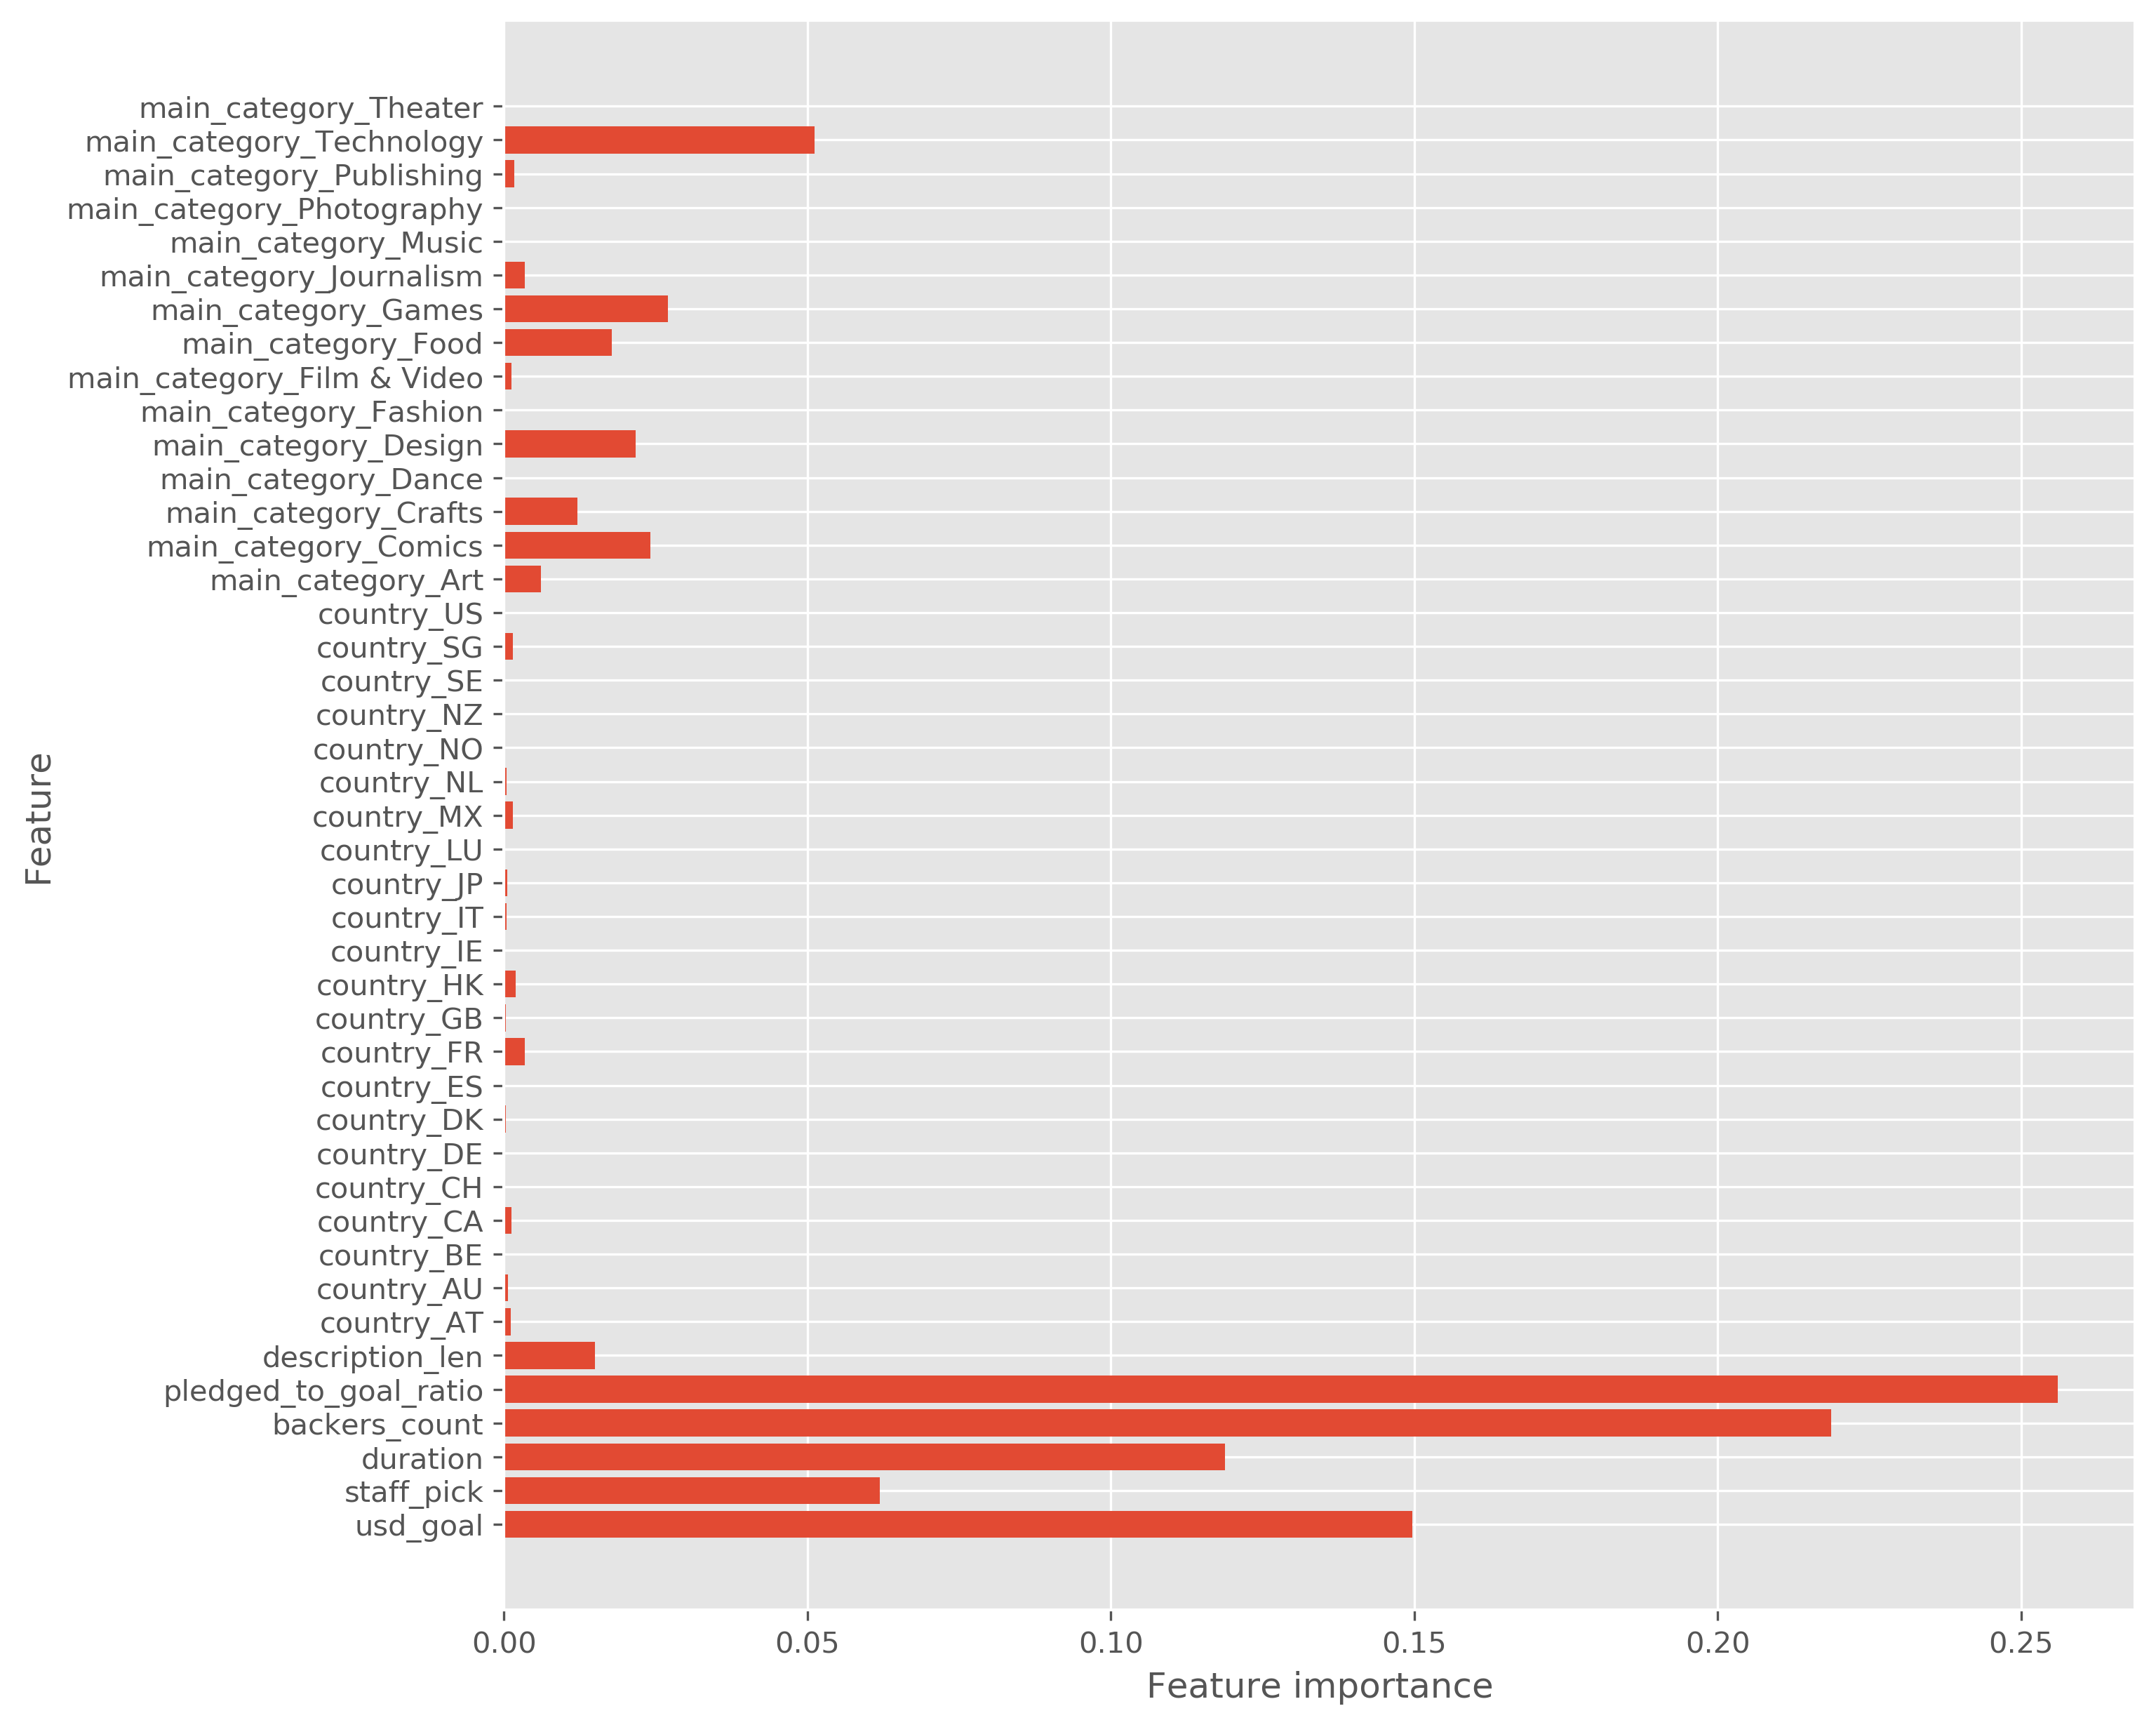

In [25]:
plot_feature_importances(forest)


In [26]:
# dt_param_grid = {
#     'n_estimators':[10,100,500], 
#     'criterion': ['gini', 'entropy'],
#     'max_depth':[2,5,7],
#     'min_samples_split':[2, 5, 10],
#     'max_features':[3,7,10,20] }

In [27]:
# # Instantiate GridSearchCV
# forest_grid_search = GridSearchCV(forest, dt_param_grid, cv=3, return_train_score=True)

# # Fit to the data
# forest_grid_search.fit(X_train, y_train)

In [28]:
# dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
# mean_dt_cv_score = np.mean(dt_cv_score)

# print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

In [29]:
# # Mean training score
# # grid_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# # Mean test score
# grid_testing_score = forest_grid_search.score(X_test, y_test)

# # print(f"Mean Training Score: {dt_gs_training_score :.2%}")
# print(f"Mean Test Score: {grid_testing_score }")
# print("Best Parameter Combination Found During Grid Search:")
# forest_grid_search.best_params_

In [30]:
forest_best = RandomForestClassifier(n_estimators=10, max_depth= 5, max_features=20, min_samples_split=10, criterion='entropy')


In [31]:
forest_best.fit(X_train, y_train)

forest_best_preds = forest_best.predict(X_test)

In [32]:
# Confusion matrix metrics
print(f"Precision Score (Test): {precision_score(y_test, forest_best_preds)}")
print(f"Recall Score (Test): {recall_score(y_test, forest_best_preds)}")
print(f"accuracy Score (Test): {accuracy_score(y_test, forest_best_preds)}")
print(f"F1 Score (Test): {f1_score(y_test, forest_best_preds)}")

print({precision_score(y_test, forest_best_preds)})
print({recall_score(y_test, forest_best_preds)})
print({accuracy_score(y_test, forest_best_preds)})
print({f1_score(y_test, forest_best_preds)})

Precision Score (Test): 0.9576719576719577
Recall Score (Test): 0.9661921708185054
accuracy Score (Test): 0.9483793517406963
F1 Score (Test): 0.9619131975199291
{0.9576719576719577}
{0.9661921708185054}
{0.9483793517406963}
{0.9619131975199291}


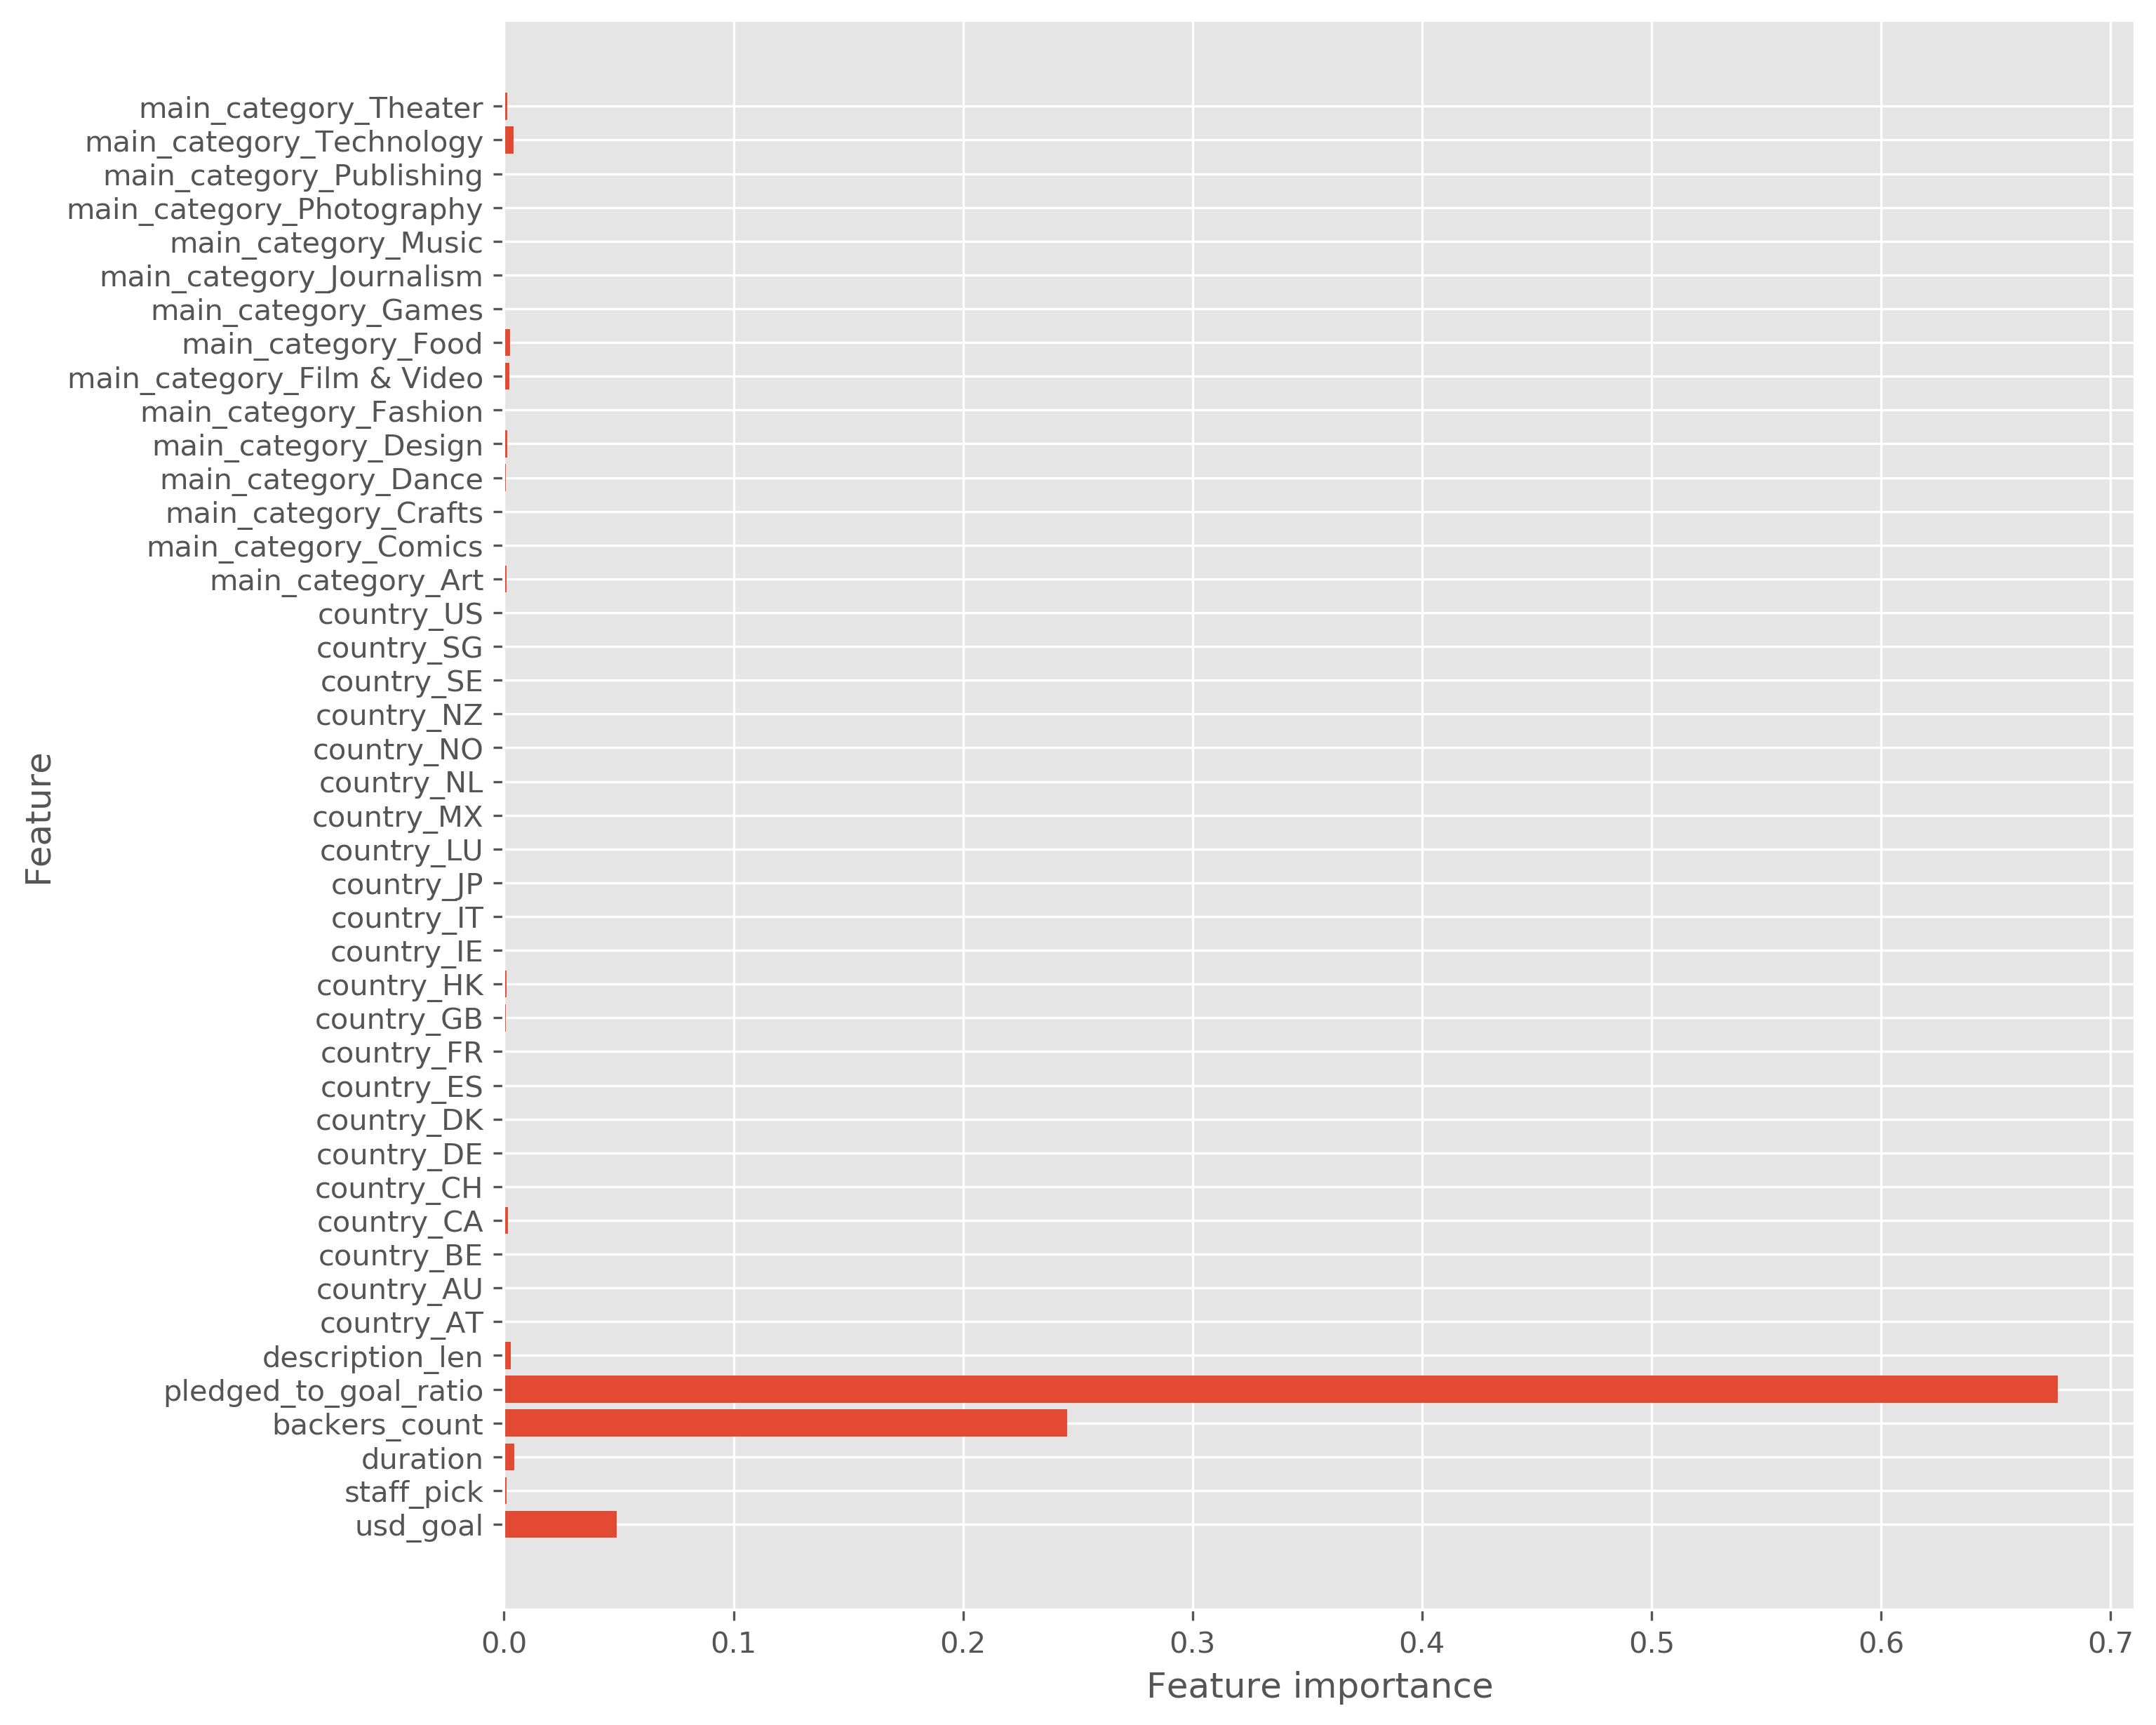

In [33]:
plot_feature_importances(forest_best)

In [36]:
import itertools

Confusion Matrix, without normalization
[[247  24]
 [ 19 543]]


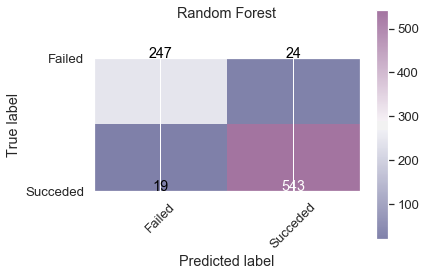

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, pad=40)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confusion = confusion_matrix(y_test, forest_best_preds)
classes = ['Failed', 'Succeded']

cmap = sns.diverging_palette(625,670, as_cmap=True, s=30, l=55)
# set_context(font_scale=1.4)
sns.set(font_scale=1.2)
# c = plotting_context("notebook", font_scale=1.5)
plot_confusion_matrix(confusion, classes,
                          normalize=False,
                          title='Random Forest',
                          cmap=cmap)


In [43]:
len(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug', 'disable_communication', 'country', 'country_displayable_name', 'currency', 'currency_symbol', 'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'is_starrable', 'backers_count', 'static_usd_rate', 'usd_pledged', 'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type', 'creator', 'location', 'category', 'profile', 'spotlight', 'urls', 'source_url', ['id', 'name', 'slug', 'short_name', 'displayable_name', 'localized_name', 'country', 'state', 'type', 'is_root', 'expanded_country', 'urls']])

35